In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [2]:
## Reading in datset.
df=pd.read_csv("train.csv")
df.head(10)

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,NaN,NaN,Clear,181,NaN,1.09,804.35
5,F6,Airline B,Lake Steveville,East Patriciafurt,6254.0,2:08,10:33,8.43,NaN,0,Tuesday,December,NaN,Low,Snow,267,NaN,1.15,596.86
6,F7,Airline B,West Samanthaland,Port Brentport,3274.0,16:21,21:57,5.60,Boeing 787,0,Wednesday,January,Spring,Low,Clear,248,Special Offer,1.03,429.53
7,F8,Airline A,Port Eric,NaN,6460.0,12:46,22:44,9.98,Boeing 777,3,Thursday,May,Fall,Medium,Cloudy,226,NaN,1.14,835.36
8,F9,Airline C,Bryanland,Jessebury,1116.0,11:31,13:58,2.46,Airbus A320,0,Wednesday,June,Fall,Medium,Cloudy,56,NaN,0.85,385.73
9,F10,Airline B,Suechester,Clintonhaven,8677.0,5:32,17:01,11.49,Airbus A380,0,Friday,July,Summer,Low,Snow,236,Special Offer,0.80,652.88


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           45000 non-null  object 
 1   Airline             41427 non-null  object 
 2   Departure_City      44660 non-null  object 
 3   Arrival_City        44814 non-null  object 
 4   Distance            44909 non-null  float64
 5   Departure_Time      45000 non-null  object 
 6   Arrival_Time        45000 non-null  object 
 7   Duration            45000 non-null  float64
 8   Aircraft_Type       44957 non-null  object 
 9   Number_of_Stops     45000 non-null  int64  
 10  Day_of_Week         44775 non-null  object 
 11  Month_of_Travel     44733 non-null  object 
 12  Holiday_Season      35980 non-null  object 
 13  Demand              44683 non-null  object 
 14  Weather_Conditions  44698 non-null  object 
 15  Passenger_Count     45000 non-null  int64  
 16  Prom

In [4]:
df.isnull().sum()

Flight_ID                 0
Airline                3573
Departure_City          340
Arrival_City            186
Distance                 91
Departure_Time            0
Arrival_Time              0
Duration                  0
Aircraft_Type            43
Number_of_Stops           0
Day_of_Week             225
Month_of_Travel         267
Holiday_Season         9020
Demand                  317
Weather_Conditions      302
Passenger_Count           0
Promotion_Type        15215
Fuel_Price               90
Flight_Price              0
dtype: int64

In [5]:
## Checkinfg for percentage using isnull.
df.isnull().sum()/df.shape[0]*100

Flight_ID              0.000000
Airline                7.940000
Departure_City         0.755556
Arrival_City           0.413333
Distance               0.202222
Departure_Time         0.000000
Arrival_Time           0.000000
Duration               0.000000
Aircraft_Type          0.095556
Number_of_Stops        0.000000
Day_of_Week            0.500000
Month_of_Travel        0.593333
Holiday_Season        20.044444
Demand                 0.704444
Weather_Conditions     0.671111
Passenger_Count        0.000000
Promotion_Type        33.811111
Fuel_Price             0.200000
Flight_Price           0.000000
dtype: float64

In [6]:
# check for duplicates in the dataset
# df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
## Descriptive annalysis
df1=df.describe()
df1

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44909.000000,45000.000000,45000.000000,45000.000000,44910.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.606270
std,2594.847860,3.292880,0.750578,72.372980,0.201736,160.239344
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3230.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7725.000000,10.650000,1.000000,238.000000,1.020000,679.692500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           45000 non-null  object 
 1   Airline             41427 non-null  object 
 2   Departure_City      44660 non-null  object 
 3   Arrival_City        44814 non-null  object 
 4   Distance            44909 non-null  float64
 5   Departure_Time      45000 non-null  object 
 6   Arrival_Time        45000 non-null  object 
 7   Duration            45000 non-null  float64
 8   Aircraft_Type       44957 non-null  object 
 9   Number_of_Stops     45000 non-null  int64  
 10  Day_of_Week         44775 non-null  object 
 11  Month_of_Travel     44733 non-null  object 
 12  Holiday_Season      35980 non-null  object 
 13  Demand              44683 non-null  object 
 14  Weather_Conditions  44698 non-null  object 
 15  Passenger_Count     45000 non-null  int64  
 16  Prom

In [9]:
df1.to_csv("Descriptive Analysis.csv")

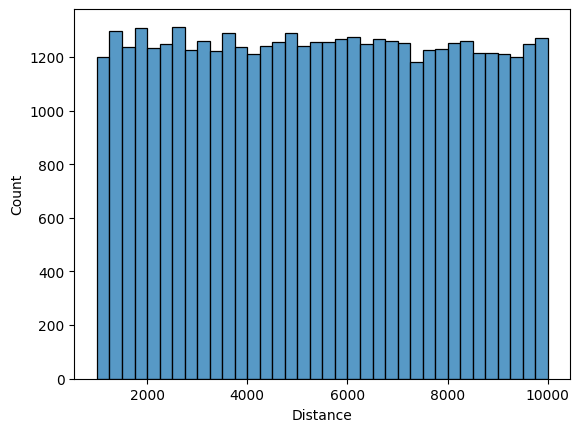

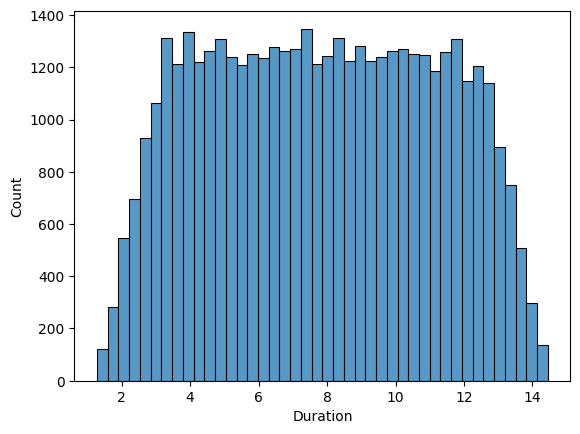

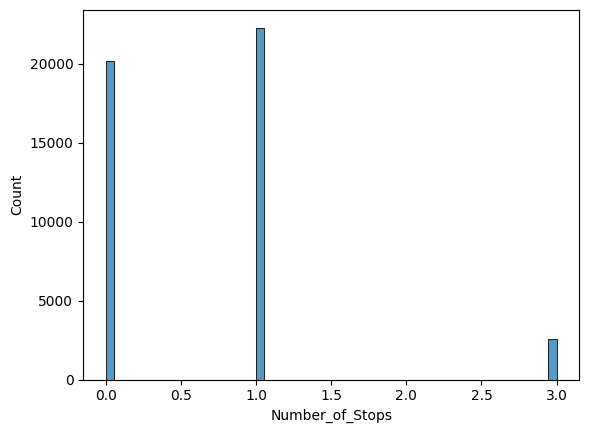

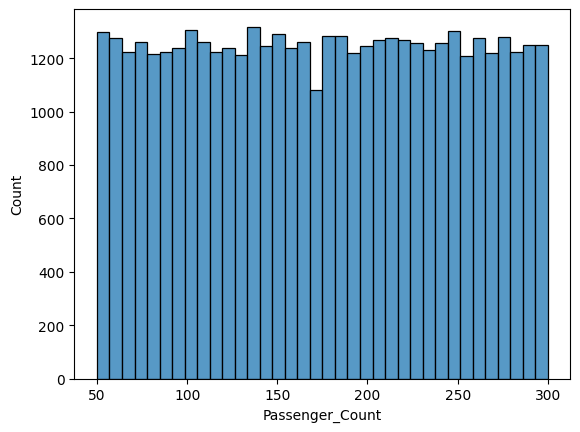

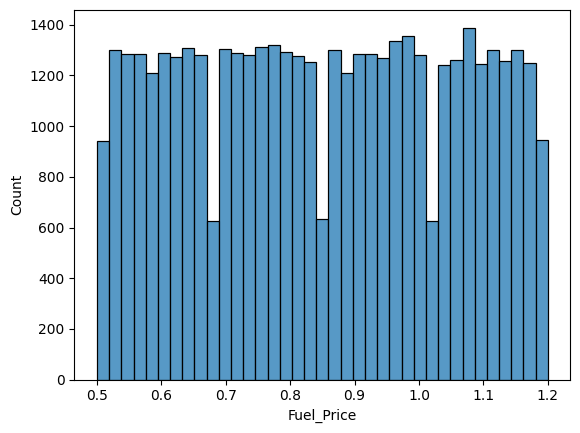

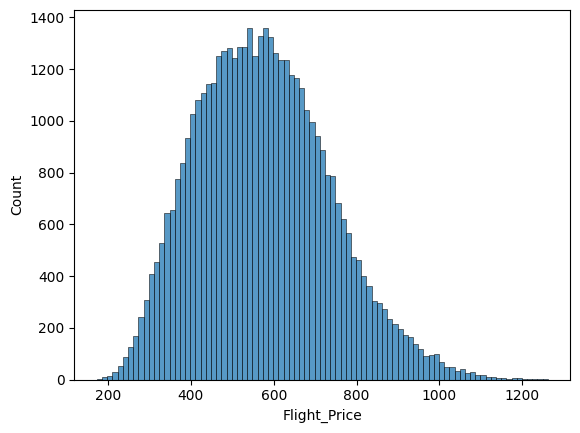

In [10]:
## distribution for numeric variable in the dataset.
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.histplot(data=df,x=i)
    plt.show()

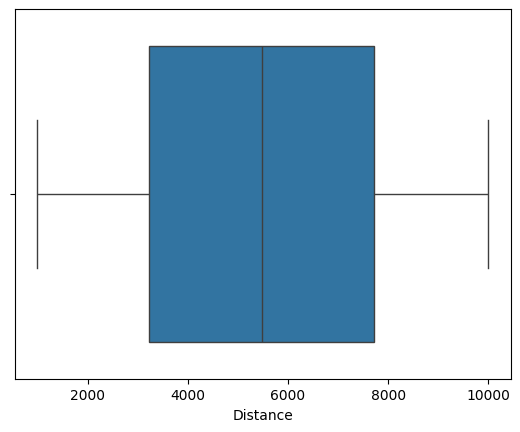

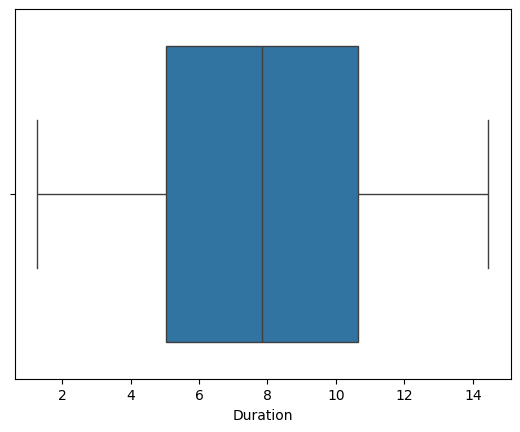

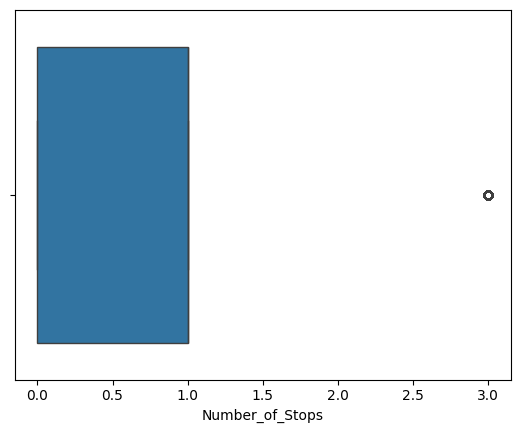

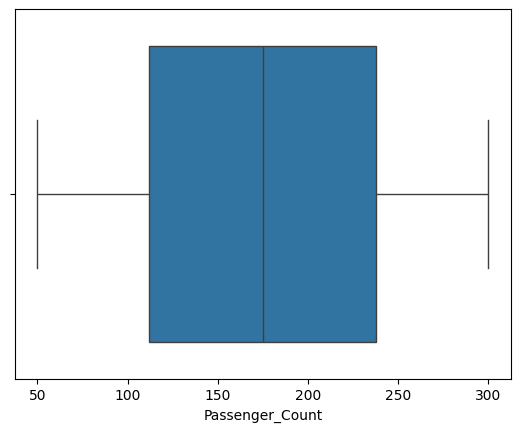

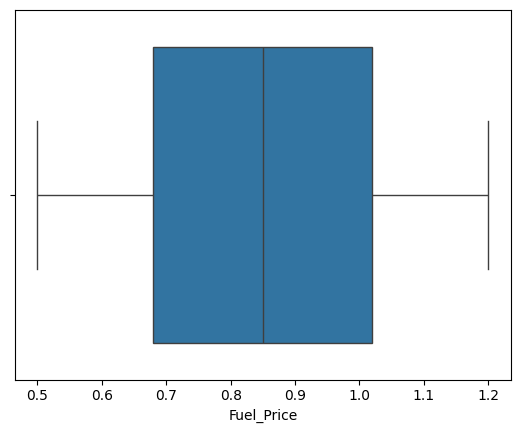

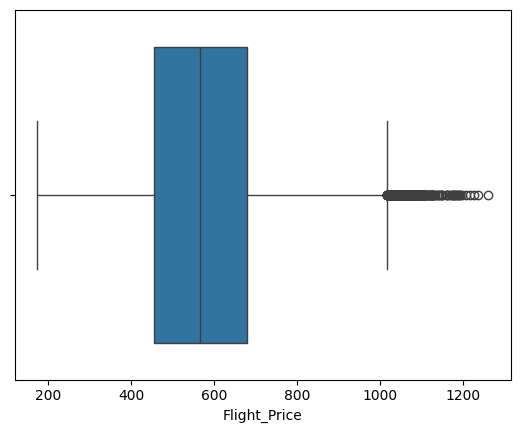

In [11]:
## Box-plot to identify outliers in the datset
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [12]:
## OUTLIER TREAtMENT
def wisker(col):
    q1,q3=np.percentile(col,(25,75))
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [13]:
## show the function of the wisker on a particular dataset
wisker(df["Flight_Price"])

(118.70499999999987, 1016.2850000000003)

In [14]:
for i in ['Flight_Price']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])
# We implement the wisker to the various columns.

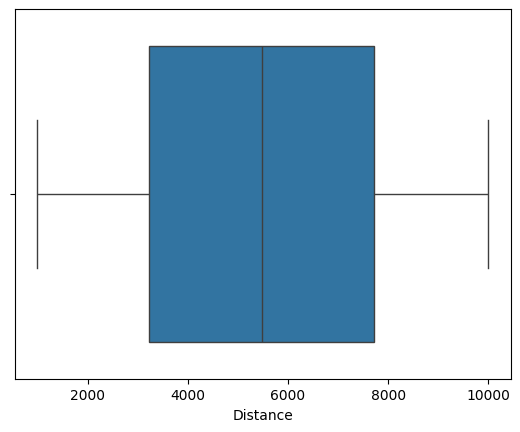

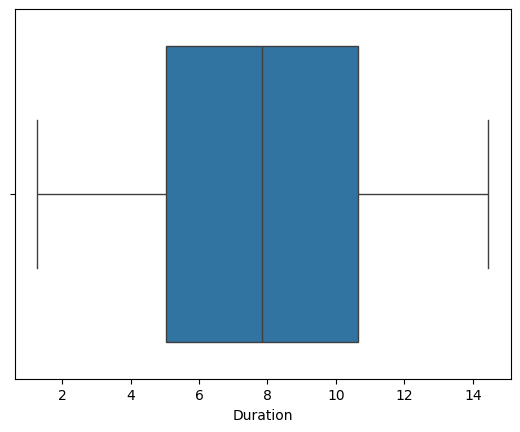

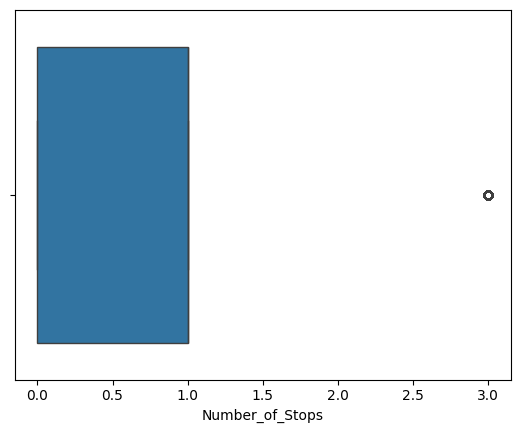

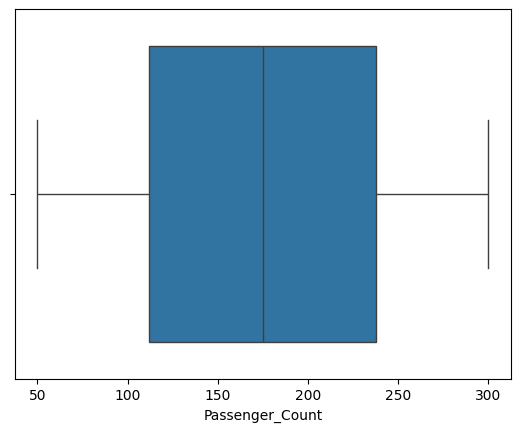

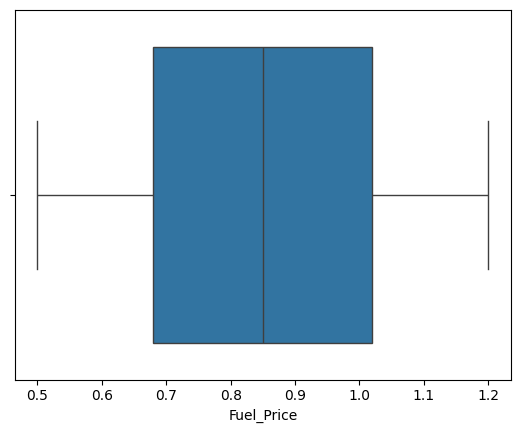

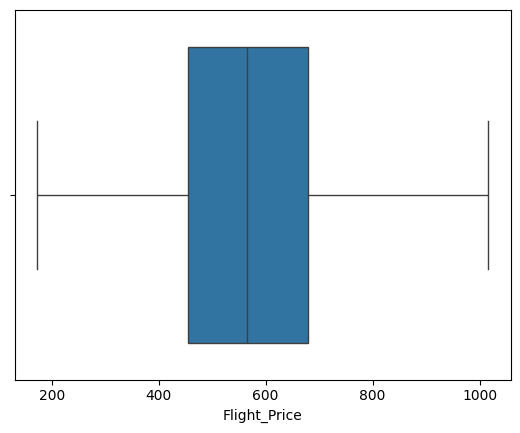

In [15]:
## Box-plot to identify outliers in the datset
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

## MISSING VALUE TREAMENT

In [16]:
import warnings
warnings.filterwarnings("ignore")
numerical_data=df.select_dtypes(include=["int64","float64"])
for x in numerical_data:
    df[x].fillna(df[x].mean(),inplace=True)
df.isnull().sum()

Flight_ID                 0
Airline                3573
Departure_City          340
Arrival_City            186
Distance                  0
Departure_Time            0
Arrival_Time              0
Duration                  0
Aircraft_Type            43
Number_of_Stops           0
Day_of_Week             225
Month_of_Travel         267
Holiday_Season         9020
Demand                  317
Weather_Conditions      302
Passenger_Count           0
Promotion_Type        15215
Fuel_Price                0
Flight_Price              0
dtype: int64

# MISSING VALUE TREAMENT

In [17]:
import warnings
warnings.filterwarnings("ignore")
category_data=df.select_dtypes(include=["object","category"])
for x in category_data:
    df[x].fillna(df[x].mode()[0],inplace=True)
df.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [18]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,0,1,16378,5763,8286.0,1343,739,11.94,4,0,6,2,2,1,2,240,1,0.91,643.93
1,11111,2,9554,12751,2942.0,748,705,5.29,0,0,6,7,1,1,2,107,1,1.08,423.13
2,22222,1,18756,15392,2468.0,150,414,4.41,4,1,3,11,2,0,1,131,1,0.52,442.17
3,33333,0,1000,2425,3145.0,744,681,4.96,4,0,3,3,0,1,1,170,0,0.71,394.42
4,39445,1,10526,14858,5558.0,839,1204,8.09,2,1,4,4,1,1,0,181,1,1.09,804.35


In [19]:
X=df.drop(["Flight_Price"],axis=1)
y=df["Flight_Price"] 

In [20]:
X.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,0,1,16378,5763,8286.0,1343,739,11.94,4,0,6,2,2,1,2,240,1,0.91
1,11111,2,9554,12751,2942.0,748,705,5.29,0,0,6,7,1,1,2,107,1,1.08
2,22222,1,18756,15392,2468.0,150,414,4.41,4,1,3,11,2,0,1,131,1,0.52
3,33333,0,1000,2425,3145.0,744,681,4.96,4,0,3,3,0,1,1,170,0,0.71
4,39445,1,10526,14858,5558.0,839,1204,8.09,2,1,4,4,1,1,0,181,1,1.09


In [21]:
y.head()

0    643.93
1    423.13
2    442.17
3    394.42
4    804.35
Name: Flight_Price, dtype: float64

In [22]:
X.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,0,1,16378,5763,8286.0,1343,739,11.94,4,0,6,2,2,1,2,240,1,0.91
1,11111,2,9554,12751,2942.0,748,705,5.29,0,0,6,7,1,1,2,107,1,1.08
2,22222,1,18756,15392,2468.0,150,414,4.41,4,1,3,11,2,0,1,131,1,0.52
3,33333,0,1000,2425,3145.0,744,681,4.96,4,0,3,3,0,1,1,170,0,0.71
4,39445,1,10526,14858,5558.0,839,1204,8.09,2,1,4,4,1,1,0,181,1,1.09


In [23]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

# FEATURE ENGINEERING

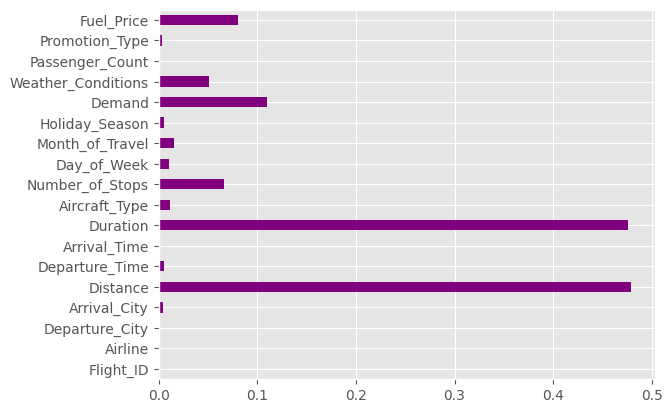

In [24]:
plt.style.use("ggplot")
importance=mutual_info_regression(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="purple")
plt.show()

# Dropping the less important columns

In [25]:
X=df.drop(['Promotion_Type','Passenger_Count','Holiday_Season','Flight_ID','Airline', 'Day_of_Week','Aircraft_Type', 'Month_of_Travel','Departure_City','Arrival_City','Departure_Time','Arrival_Time','Flight_Price'],axis=1)
X.columns

Index(['Distance', 'Duration', 'Number_of_Stops', 'Demand',
       'Weather_Conditions', 'Fuel_Price'],
      dtype='object')

In [26]:
Xtrain, xtest,ytrain,ytest=train_test_split(X,y,test_size=0.10,random_state=1)

In [27]:
from sklearn.pipeline import Pipeline
Pipelines={
      "LinearRegression_Model":Pipeline([("Scaler",StandardScaler()),("Regression",LinearRegression())]),
      "DecisionTreeRegressor_Model":Pipeline([("Scaler",StandardScaler()),("Regression",DecisionTreeRegressor())]),
      "MLPRegressor_Model":Pipeline([('Scaler',StandardScaler()),('Regression',MLPRegressor())]),
      "RandomForestRegressor_Model":Pipeline([('Scaler',StandardScaler()),('Regression',RandomForestRegressor())]),
}

# FITTING DATASET

FITTING TRAIN SET TO DIFFERENT MODELS

In [28]:
from sklearn.pipeline import Pipeline
for name, pipeline in Pipelines.items():
    accuracy=pipeline.fit(Xtrain,ytrain)
    print("Done fitting Training set to the",name,".\n")

Done fitting Training set to the LinearRegression_Model .

Done fitting Training set to the DecisionTreeRegressor_Model .

Done fitting Training set to the MLPRegressor_Model .

Done fitting Training set to the RandomForestRegressor_Model .



# PREDICTED OUTCOME

In [29]:
for name,pipeline in Pipelines.items():
    pred1=pipeline.predict(xtest)
    print(name,"Prediction","\n",pred1,"\n")

LinearRegression_Model Prediction 
 [666.96238367 667.35917442 727.23352999 ... 481.08192508 499.27718445
 700.89049791] 

DecisionTreeRegressor_Model Prediction 
 [540.48 541.09 805.61 ... 467.75 493.08 586.16] 

MLPRegressor_Model Prediction 
 [603.83400743 557.58465014 788.19258077 ... 497.88182477 508.27899318
 623.36616113] 

RandomForestRegressor_Model Prediction 
 [576.819  555.3258 796.9853 ... 496.9176 509.0253 597.6604] 



# ACCURACY TEST

In [30]:
for name,pipeline in Pipelines.items():
    accuracy=pipeline.score(xtest,ytest)
    print(F"accuracy of {name}:","------------------------", accuracy)
    print("Mean Absolute Error for:",name,"------------", mean_absolute_error(ytest,pipeline.predict(xtest)))
    print("Mean Absolute Percentage Error for:",name,"-", mean_absolute_percentage_error(ytest,pipeline.predict(xtest)))
    print("Mean Squared Error for:",name,"-------------", mean_squared_error(ytest,pipeline.predict(xtest)))
    # R-Squared i use only on regression model There fore,
    print(name,"perfamance, R-Squared:","--------------",r2_score(ytest,pipeline.predict(xtest)))
    # will excluded
    print("")

accuracy of LinearRegression_Model: ------------------------ 0.8404573273005413
Mean Absolute Error for: LinearRegression_Model ------------ 50.696566239240816
Mean Absolute Percentage Error for: LinearRegression_Model - 0.09174623385579316
Mean Squared Error for: LinearRegression_Model ------------- 4031.3399072819734
LinearRegression_Model perfamance, R-Squared: -------------- 0.8404573273005413

accuracy of DecisionTreeRegressor_Model: ------------------------ 0.8917362246246783
Mean Absolute Error for: DecisionTreeRegressor_Model ------------ 41.62833222222222
Mean Absolute Percentage Error for: DecisionTreeRegressor_Model - 0.07812675165985211
Mean Squared Error for: DecisionTreeRegressor_Model ------------- 2735.6196984722224
DecisionTreeRegressor_Model perfamance, R-Squared: -------------- 0.8917362246246783

accuracy of MLPRegressor_Model: ------------------------ 0.9474778648085551
Mean Absolute Error for: MLPRegressor_Model ------------ 29.426261090502756
Mean Absolute Percen

# ACTUAL-VALUE VERSUS PREDICTED-OUTCOME

In [31]:
for name,pipeline in Pipelines.items():
    accuracy=pipeline.score(xtest,ytest)
    Precision=r2_score(ytest,pipeline.predict(xtest))
    print(F"{name} accuracy:",accuracy)
    print(F"{name} accuracy:",Precision)
    outcome={
        "Actual Price":ytest,
        "predicted Price":pipeline.predict(xtest)
        }
    df3=pd.DataFrame(outcome)
    print(name,"\n",df3.head(),"\n")

LinearRegression_Model accuracy: 0.8404573273005413
LinearRegression_Model accuracy: 0.8404573273005413
LinearRegression_Model 
        Actual Price  predicted Price
25275        578.27       666.962384
12561        548.79       667.359174
24707        824.88       727.233530
25066        454.38       400.893773
33429        875.75       777.831360 

DecisionTreeRegressor_Model accuracy: 0.8917362246246783
DecisionTreeRegressor_Model accuracy: 0.8917362246246783
DecisionTreeRegressor_Model 
        Actual Price  predicted Price
25275        578.27           540.48
12561        548.79           541.09
24707        824.88           805.61
25066        454.38           451.15
33429        875.75           874.95 

MLPRegressor_Model accuracy: 0.9474778648085551
MLPRegressor_Model accuracy: 0.9474778648085551
MLPRegressor_Model 
        Actual Price  predicted Price
25275        578.27       603.834007
12561        548.79       557.584650
24707        824.88       788.192581
25066        4

# REGRESSION MATRIX

LinearRegression_Model accuracy: 0.8404573273005413
Evaluating LinearRegression_Model on the testing data
LinearRegression_Model perfamance, R-Squared: 0.8404573273005413


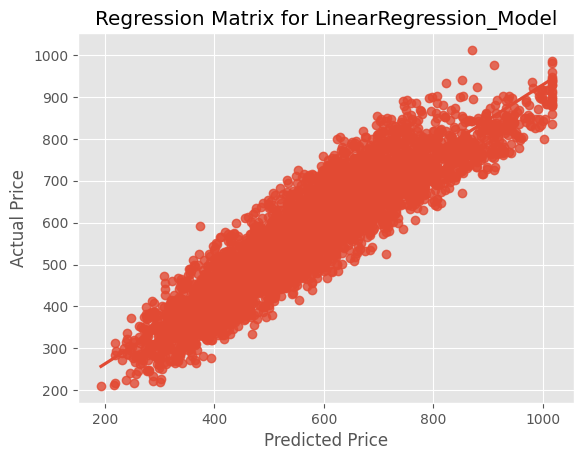

DecisionTreeRegressor_Model accuracy: 0.8917362246246783
Evaluating DecisionTreeRegressor_Model on the testing data
DecisionTreeRegressor_Model perfamance, R-Squared: 0.8917362246246783


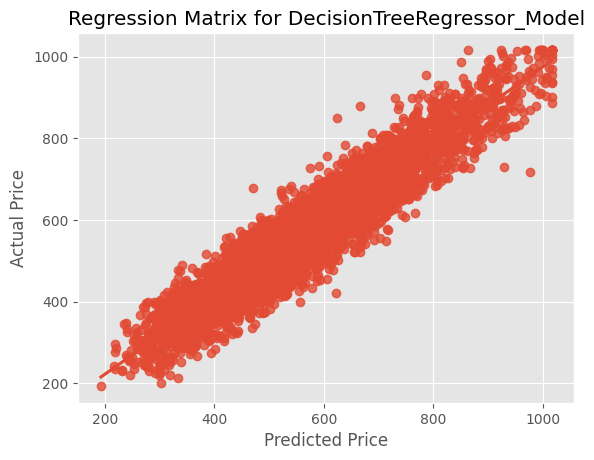

MLPRegressor_Model accuracy: 0.9474778648085551
Evaluating MLPRegressor_Model on the testing data
MLPRegressor_Model perfamance, R-Squared: 0.9474778648085551


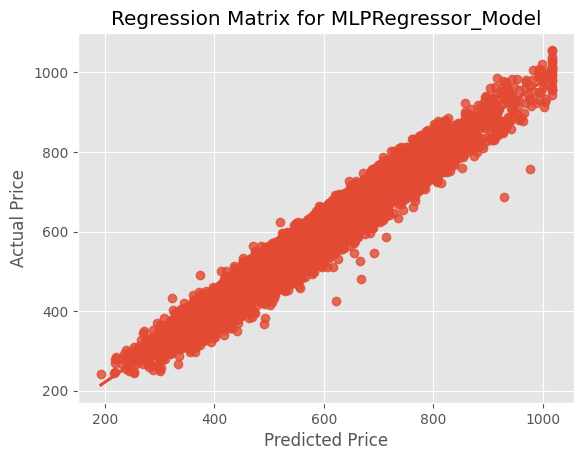

RandomForestRegressor_Model accuracy: 0.9388620928414657
Evaluating RandomForestRegressor_Model on the testing data
RandomForestRegressor_Model perfamance, R-Squared: 0.9388620928414657


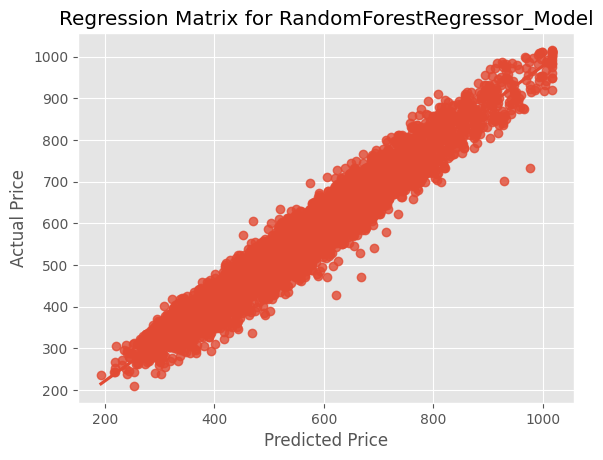

In [32]:
for name,pipeline in Pipelines.items():
    accuracy=pipeline.score(xtest,ytest)
    print(F"{name} accuracy:",accuracy)
    print(f"Evaluating {name} on the testing data")
    print(name,"perfamance, R-Squared:",r2_score(ytest,pipeline.predict(xtest)))
    plt.figure()
    sns.regplot(x=ytest,y=pipeline.predict(xtest))
    plt.title(f"Regression Matrix for {name}")
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.show()

In [33]:
import joblib

In [34]:
for name,pipeline in Pipelines.items():
    joblib.dump(pipeline,f"Model{name}.joblib")
    print(f"Model{name} saved successfully...\n")

ModelLinearRegression_Model saved successfully...

ModelDecisionTreeRegressor_Model saved successfully...

ModelMLPRegressor_Model saved successfully...

ModelRandomForestRegressor_Model saved successfully...



In [35]:
Model_Loaded=joblib.load("ModelDecisionTreeRegressor_Model.joblib")

In [36]:
Model_Loaded.predict(xtest)

array([540.48, 541.09, 805.61, ..., 467.75, 493.08, 586.16])

In [37]:
Model_Loaded.score(xtest,ytest)

0.8917362246246783